In [3]:
import nibabel as nib
import glob
import matplotlib.pyplot as plt
import numpy as np

In [45]:
files_RHUH = glob.glob(r'C:\Users\gaspa\Desktop\segmentation_test\Datasets\RHUH-GBM_nii_v1\RHUH-*\*\*segmentations.nii')
# FOR RHUH : 1 = necrosis, 2 = edema, 3 = enhancing region, 4 = none

range(0, 116)


In [47]:
mask = r'sub-10_ses-09122002BRAINROUTINE59543_acq-MaskBrain_run-1_desc-brain_mask.nii.gz'
t1 = r'sub-10_ses-09122002BRAINROUTINE59543_run-1_anatomic.nii.gz'

mask_data = nib.load(mask)
t1_data = nib.load(t1)

print(mask_data.shape, t1_data.shape)

(280, 320, 24) (280, 320, 24)


In [2]:
files_BraTS = glob.glob(r'C:\Users\gaspa\Desktop\segmentation_test\Datasets\BRATS_DATASET\*\*_seg.nii\*seg.nii')
# FOR BraTS : 1 = necrosis, 2 = edema, 4 = enhancing region, 0 = none

In [4]:
sri24_atlas_file = r'Atlases\sri24_spm8\templates\T1_brain.nii'
fisher_file = r'prob_dist_results(not up to date)\combined_prob_dist.nii'

fisher_file_data = nib.load(fisher_file)
fisher_file_affine = fisher_file_data.affine

sri24_atlas_data = nib.load(sri24_atlas_file)
sri24_atlas_data_fdata = sri24_atlas_data.get_fdata()

img = nib.Nifti1Image(sri24_atlas_data_fdata, fisher_file_affine)
nib.save(img, 'sri24_atlas.nii')

In [13]:
mni_atlas_file = r'Atlases\mni_icbm152_t1_tal_nlin_asym_09a_brain_only\mni_icbm152_t1_tal_nlin_asym_09a_brain_only.nii'

In [24]:
files_QSC = r'Datasets\QIN-DSC-BRAIN\tumor_mask\sub-01_ses-08102001MRSPECTROSCOPYFH37743_acq-MaskTumor_run-1_desc-tumor_mask.nii'

In [43]:
file_BTP_affine = r'Comparisons\BRAIN-TUMOR-PROGRESSION\BTP_affine\BRAIN-TUMOR-PROGRESSION_DATASET\probdist_BTP_whole_tumor.nii'
BTP_affine_data = nib.load(file_BTP_affine)
affine_BTP = BTP_affine_data.affine
BTP_affine = BTP_affine_data.get_fdata()

file_BTP_def = r'Comparisons\BRAIN-TUMOR-PROGRESSION\BTP_def\prob_dist_BTP\probdist_BTP_whole_tumor.nii'
BTP_def_data = nib.load(file_BTP_def)
def_affine = BTP_def_data.affine
BTP_def = BTP_def_data.get_fdata()

print(def_affine, affine_BTP)

manual_affine = np.array([[-1., 0., 0., -120.], [0., -1., 0., -129.], [0., 0., 1., -68.], [0., 0., 0., 1.]])

# save file

img = nib.Nifti1Image(BTP_affine, affine = manual_affine)
nib.save(img, 'Comparisons\BRAIN-TUMOR-PROGRESSION\BTP_affine\BRAIN-TUMOR-PROGRESSION_DATASET\probdist_BTP_whole_tumor_same_center.nii')

[[   1.    0.    0. -120.]
 [   0.    1.    0. -129.]
 [   0.    0.    1.  -68.]
 [   0.    0.    0.    1.]] [[ -1.   0.   0.  -0.]
 [  0.  -1.   0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


(512, 512, 23)


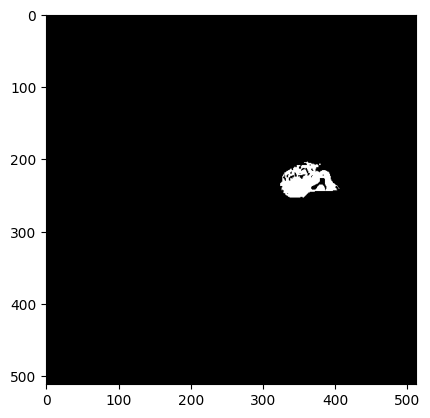

In [29]:
QIN = nib.load(files_QSC)
QIN_data = QIN.get_fdata()


print(QIN_data.shape)
plt.imshow(QIN_data[:,:,17], cmap='gray')

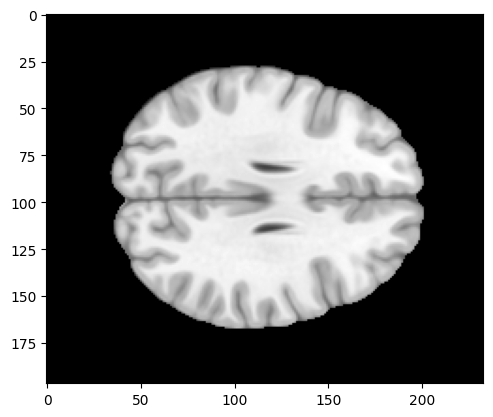

In [14]:
atlas = nib.load(mni_atlas_file)
atlas_data = atlas.get_fdata()

plt.imshow(atlas_data[:,:,100], cmap='gray')

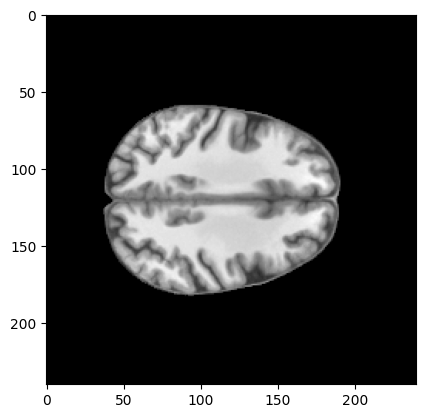

In [11]:
atlas = nib.load(sri24_atlas_file)
atlas_data = atlas.get_fdata()

plt.imshow(atlas_data[:,:,100], cmap='gray')

(240, 240, 155)


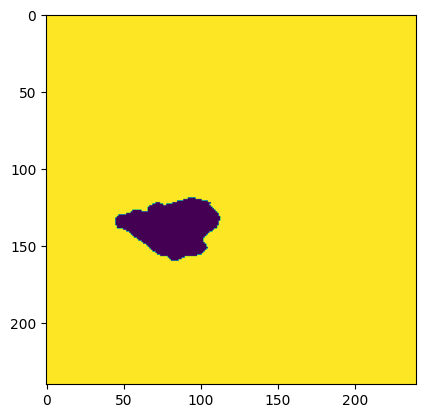

In [12]:
sample_BraTS = nib.load(files_BraTS[0])
data_BraTS = sample_BraTS.get_fdata()

data = data_BraTS == 0

print(data_BraTS.shape)

plt.imshow(data[:,:,80])

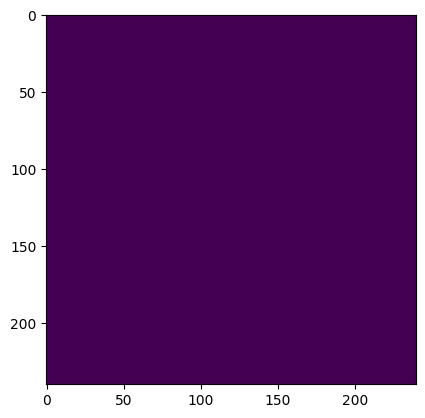

In [37]:
sample_RHUH = nib.load(files_RHUH[0])
data_RHUH = sample_RHUH.get_fdata()

data = data_RHUH == 4

plt.imshow(data[:,:,80])

20
7.0


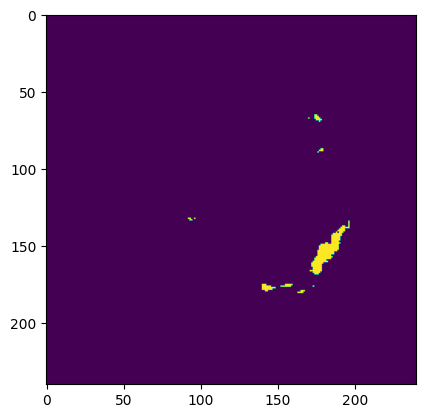

In [12]:
# get all the nifti files
files = glob.glob(r'C:\Users\gaspa\Desktop\segmentation_test\Datasets\BRAIN-TUMO-PROGRESSION_DATASET\Brain-Tumor-Progression\sub-*\BraTSPipeline_sub*\brainTumorMask_SRI.nii')

# Get the affine matrix

sample = files[0]
sample_img = nib.load(sample)
affine = sample_img.affine

print(len(files))

result_array_whole_tumor = np.zeros((240,240,155))
for file in files:
    img = nib.load(file)
    data = img.get_fdata()
    #get binary mask
    data[data > 0] = 1

    result_array_whole_tumor += data

result_array_necrotic_core = np.zeros((240,240,155))
for file in files:
    img = nib.load(file)
    data = img.get_fdata()
    # Get necrotic core
    data = data == 1
    data[data > 0] = 1

    result_array_necrotic_core += data

result_array_enhancing_region = np.zeros((240,240,155))
for file in files:
    img = nib.load(file)
    data = img.get_fdata()
    # Get enhancing region
    data = data == 4 
    data[data > 0] = 1

    result_array_enhancing_region += data

result_array_edema= np.zeros((240,240,155))
for file in files:
    img = nib.load(file)
    data = img.get_fdata()
    # Get edema
    data = data == 2
    data[data > 0] = 1

    result_array_edema += data

print(max(result_array_enhancing_region.flatten()))

plt.imshow(result_array_enhancing_region[:,:,100])


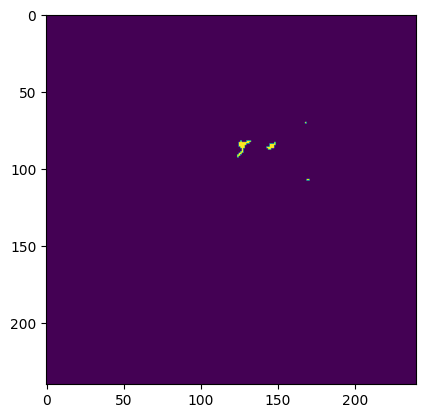

In [28]:
sample = files[16]
sample_img = nib.load(sample)
sample_data = sample_img.get_fdata()

data = sample_data == 4

plt.imshow(data[:,:,80])

In [16]:
# Save result array as nifti file



img_whole_tumor = nib.Nifti1Image(result_array_whole_tumor, np.eye(4), header=img.header)
nib.save(img_whole_tumor, r'C:\Users\gaspa\Desktop\segmentation_test\test.nii')

img_edema = nib.Nifti1Image(result_array_edema, np.eye(4), header=img.header)
nib.save(img_edema, r'C:\Users\gaspa\Desktop\segmentation_test\test1.nii')

img_necrotic_core = nib.Nifti1Image(result_array_necrotic_core, np.eye(4), header=img.header)
nib.save(img_necrotic_core, r'C:\Users\gaspa\Desktop\segmentation_test\test2.nii')

img_enhancing_tumor = nib.Nifti1Image(result_array_enhancing_region, np.eye(4), header=img.header)
nib.save(img_enhancing_tumor, r'C:\Users\gaspa\Desktop\segmentation_test\test3.nii')

In [10]:
prob_dist = result_array / len(files)

print(prob_dist.shape)
print(sum(prob_dist.flatten()))

collapsed_array = np.sum(prob_dist, axis=2)
collapsed_array_stats = collapsed_array / 155
print(collapsed_array_stats.shape)
print(max(collapsed_array_stats.flatten()))

(240, 240, 155)
107815.43589664417
(240, 240)
0.1369727047146402


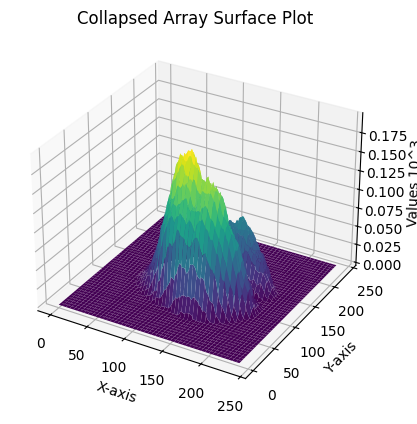

In [19]:
# Visualize probability distribution as a 2D surface plot

collapsed_array = np.sum(result_array, axis=2)
collapsed_array_plot = collapsed_array / sum(collapsed_array.flatten())
collapsed_array_plot = collapsed_array_plot * 1000

# Create X, Y grids for the surface plot
x = np.arange(0, collapsed_array_plot.shape[1])
y = np.arange(0, collapsed_array_plot.shape[0])
X, Y = np.meshgrid(x, y)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, collapsed_array_plot, cmap='viridis')


ax.set_title("Collapsed Array Surface Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Values 10^3")

plt.savefig("surface_plot.png")

